In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
import matplotlib as mpl
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [ ]:
mnist.keys()

In [ ]:
import numpy as np

x, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8) # !!! Important to turn the strings into int's, otherwise the classfier will error.
x_train, x_test, y_train,  y_test = x[:60000], x[60000:], y[:60000], y[6000:]

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

[False]


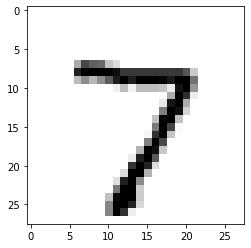

In [100]:
not_five = np.array(x_test.iloc[0])
five = np.array(x_test.iloc[15])

print(sgd_clf.predict(not_five.reshape(1, -1)))
plt.imshow(not_five.reshape(28,28),cmap="binary")

[ True]


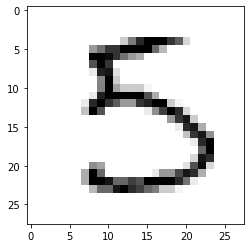

In [101]:
print(sgd_clf.predict(five.reshape(1, -1)))
plt.imshow(five.reshape(28,28),cmap="binary")

In [108]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

The above scoring is a bad way to measure performance here, as most of the numbers are not 5. And such a estimator that alway's estimates "not 5", will have a great performance, as this is true most of the time. Their are 2 alternatives that are discussed in the book:

1. Confunsion matrix:
    - precision = TP/(TP + FP)
    - recall = TP/(TP+FN) aka sensitivity or true possive rate
    This leads to the PR-curve which you should use when when positive class is rare.
2. ROC Curve: (the way I already knew)
    Plots the true positive rate versus the true negative rate
    Use this when the negative class is rare.

In [113]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [116]:
# It's possible to normalize the values (not mentioned in the book)
confusion_matrix(y_train_5, y_train_pred, normalize='true')

array([[0.98741274, 0.01258726],
       [0.34882863, 0.65117137]])

In [120]:
# From the confusion matrix we can calculate the precision and recall. Or we can get them directly from the api:
from sklearn.metrics import precision_score, recall_score
print("precision score:"+str(precision_score(y_train_5, y_train_pred)))
print("recall_score: " + str(recall_score(y_train_5, y_train_pred)))

precision score:0.8370879772350012
recall_score: 0.6511713705958311


In [130]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

In [131]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Text(0, 0.5, 'true positive rate')

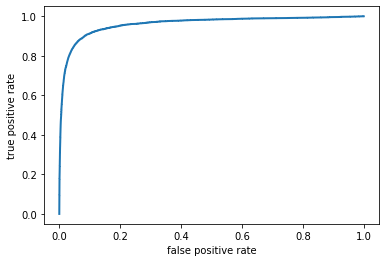

In [136]:
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")